<a href="https://colab.research.google.com/github/TheOnlylight/C/blob/master/BrainExplanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Brain Pulse analysis from fMRI aspect

*this project and its thory are inspired by the SPM fMRI*

By reading the source code of the 1st level analysis, it is not hard to find that the regressor X in $Y = X \times B + \epsilon$ is generated using the *spm_Volterra.m* this function is in charge of 
```
% Generalized convolution of inputs (U) with basis set (bf)
% FORMAT [X,Xname,Fc] = spm_Volterra(U,bf,V)
% U          -  input structure array (see spm_get_ons.m)
% bf         -  Basis functions (see spm_get_bf.m)
% V          -  [1 or 2] order of Volterra expansion [default = 1]
%
% X          -  Design Matrix
% Xname      -  names of regressors [columns] in X
% Fc(i).i    -  indices pertaining to input i (and interactions)
% Fc(i).name -  names pertaining to input i   (and interactions)
% Fc(i).p    -  grouping of regressors per parameter
%__________________________________________________________________________
%
% For first order expansions spm_Volterra simply convolves the causes (e.g.
% stick functions) in U.u by the basis functions in bf to create a design
% matrix X.  For second order expansions new entries appear in X, Xname and
% Fc that correspond to the interaction among the original causes. The
% basis functions for these effects are two dimensional and are used to
% assemble the second order kernel in spm_graph.m. Second order effects are
% computed for only the first column of U.u.
```
this function requries bf --> bf         -  Basis functions (see spm_get_bf.m)

the function *spm_get_bf.m* is in charge of generating the original pulse function.
```
% Fill in basis function structure
% FORMAT [xBF] = spm_get_bf(xBF)
%
% xBF.dt      - time bin length {seconds}
% xBF.name    - description of basis functions specified
%               'hrf'
%               'hrf (with time derivative)'
%               'hrf (with time and dispersion derivatives)'
%               'Fourier set'
%               'Fourier set (Hanning)'
%               'Gamma functions'
%               'Finite Impulse Response'
%               (any other specification will default to 'hrf')
% xBF.length  - window length (seconds)
% xBF.order   - order
% xBF.T       - microtime resolution (for 'hrf*')
%
% xBF.bf      - array of basis functions
%__________________________________________________________________________
%
% spm_get_bf prompts for basis functions to model event or epoch-related
% responses.  The basis functions returned are unitary and orthonormal
% when defined as a function of peri-stimulus time in time-bins.
% It is at this point that the distinction between event and epoch-related 
% responses enters.
```

and if we go a step further we will find the function in charge of generating hemodynamic function.
```
function [hrf,p] = spm_hrf(RT,P,T)
% Return a hemodynamic response function
% FORMAT [hrf,p] = spm_hrf(RT,p,T)
% RT   - scan repeat time
% p    - parameters of the response function (two Gamma functions)
%
%                                                           defaults
%                                                          (seconds)
%        p(1) - delay of response (relative to onset)          6
%        p(2) - delay of undershoot (relative to onset)       16
%        p(3) - dispersion of response                         1
%        p(4) - dispersion of undershoot                       1
%        p(5) - ratio of response to undershoot                6
%        p(6) - onset (seconds)                                0
%        p(7) - length of kernel (seconds)                    32
%
% T    - microtime resolution [Default: 16]
%
% hrf  - hemodynamic response function
% p    - parameters of the response function
%__________________________________________________________________________
% Copyright (C) 1996-2014 Wellcome Trust Centre for Neuroimaging

% Karl Friston
% $Id: spm_hrf.m 6108 2014-07-16 15:24:06Z guillaume $


%-Parameters of the response function
```
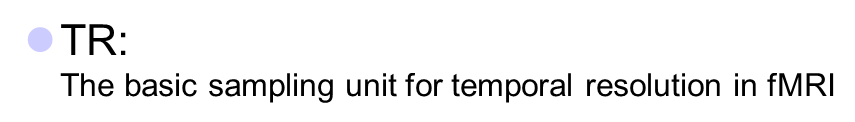
however the two seems the same thing

In [51]:
import pandas as np
import numpy as pd
import math

The code above is the basic computation transferred directly from matlab

In [46]:
class xBF:
    def __init__(self,dt,name,length,order,T,bf):
        self.name = name
        self.dt = dt
        self.length = length
        self.order = order
        

In [88]:
RT=0.375
P=None
T=16
p = [6,16,1,1,6,0,32]
dt=RT / T
u = pd.arange(0,math.ceil(p[6] / dt))
# print(round(p[5]/dt))
# u = u[:round(p[5]/dt)]
hrf=spm_Gpdf(u,p[0] / p[2],dt / p[2]) - spm_Gpdf(u,p[1] / p[3],dt / p[3]) / p[4]
print(u)

NameError: ignored

In [47]:
sb = xBF(100,'hrf',1000,0,0.1,0)
print(sb.dt)

hrf = spm_hrf()

100


NameError: ignored

The Brain hemodynamic part is a bit difficult to compute from the scratch. Here we use an alternative way: use the already generated list from Matlab. the tr set to 0.375

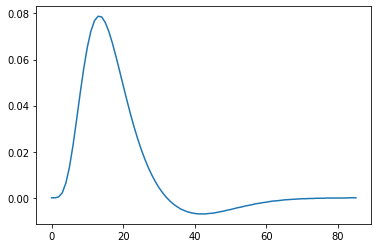

In [95]:
hrf = [0.0, 0.0, 0.0004, 0.0022, 0.0064, 0.0133, 0.0228, 0.0339, 0.0454, 0.0562, 0.0654, 0.0724, 0.0769, 0.0788, 0.0785, 0.0761, 0.0722, 0.0671, 0.0613, 0.0551, 0.0488, 0.0426, 0.0366, 0.031, 0.0259, 0.0212, 0.017, 0.0132, 0.0099, 0.007, 0.0044, 0.0022, 0.0003, -0.0013, -0.0027, -0.0038, -0.0048, -0.0055, -0.0061, -0.0065, -0.0068, -0.007, -0.007, -0.007, -0.0068, -0.0067, -0.0064, -0.0061, -0.0058, -0.0054, -0.0051, -0.0047, -0.0043, -0.004, -0.0036, -0.0033, -0.003, -0.0026, -0.0024, -0.0021, -0.0019, -0.0016, -0.0014, -0.0013, -0.0011, -0.0009, -0.0008, -0.0007, -0.0006, -0.0005, -0.0004, -0.0004, -0.0003, -0.0003, -0.0002, -0.0002, -0.0002, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0, -0.0, -0.0]
import matplotlib.pyplot as plt
x = pd.arange(0,len(hrf))
fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, hrf, label='Using set_dashes()')
hrff = [0.0, 0.0, 0.0002, 0.001, 0.0031, 0.0068, 0.0122, 0.0192, 0.0272, 0.0356, 0.0438, 0.0512, 0.0574, 0.0622, 0.0654, 0.0671, 0.0673, 0.0661, 0.0639, 0.0608, 0.057, 0.0528, 0.0483, 0.0436, 0.0391, 0.0346, 0.0303, 0.0263, 0.0225, 0.0191, 0.0159, 0.013, 0.0104, 0.008, 0.0059, 0.004, 0.0024, 0.0009, -0.0004, -0.0015, -0.0024, -0.0033, -0.004, -0.0045, -0.005, -0.0054, -0.0056, -0.0058, -0.0059, -0.006, -0.006, -0.0059, -0.0058, -0.0056, -0.0054, -0.0052, -0.005, -0.0047, -0.0045, -0.0042, -0.0039, -0.0037, -0.0034, -0.0032, -0.0029, -0.0027, -0.0024, -0.0022, -0.002, -0.0018, -0.0016, -0.0015, -0.0013, -0.0012, -0.001, -0.0009, -0.0008, -0.0007, -0.0006, -0.0006, -0.0005, -0.0004, -0.0004, -0.0003, -0.0003, -0.0002, -0.0002, -0.0002, -0.0002, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0, -0.0, -0.0, -0.0, -0.0]

# Box Car
the second part is the generation of the box car

the box car is the experiment design
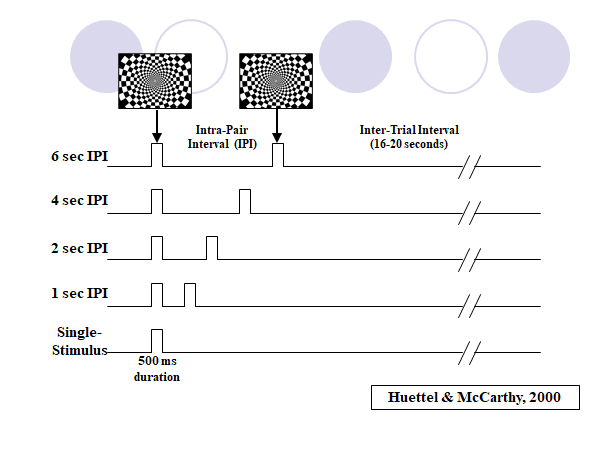

since in the prior we use the 32 second in total and 0.32 as the TR(RT)same thing
here the representation time for one temporal gap will be 10 ms

In [103]:
pulses_num = input('the impulses you would like to see')
start_t = []
last_t = []
for i in range(0,int(pulses_num)):
    start_t.append(input('the start time for pulse '+str(i))) 
    last_t.append(input('the last period for pulse ' + str(i)))


the impulses you would like to see1
the start time for pulse00
the last period for pulse01
